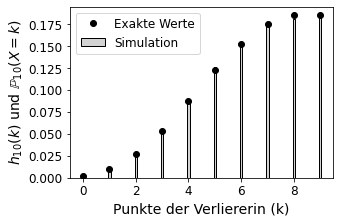

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

# Hilfsfunktion, um die Binomialkoeffizienten zu berechnen
def binomial(n, k):
    return math.comb(n, k)

# Exakte Wahrscheinlichkeiten P(X_n=k)
def berechne_exakte_wahrscheinlichkeiten(n):
    wahrscheinlichkeiten = []
    for k in range(n):
        p = 2 * binomial(n + k - 1, k) * (0.5 ** (n + k))
        wahrscheinlichkeiten.append(p)
    return wahrscheinlichkeiten

# Simuliere ein einzelnes Spiel
def simuliere_spiel(n):
    punkte_anne = 0
    punkte_beate = 0
    
    while punkte_anne < n and punkte_beate < n:
        if random.random() < 0.5:  # Anne gewinnt die Runde
            punkte_anne += 1
        else:  # Beate gewinnt die Runde
            punkte_beate += 1
            
    if punkte_anne == n:
        return punkte_beate  # Beate ist Verliererin
    else:
        return punkte_anne  # Anne ist Verliererin

# Simuliere mehrere Spiele und sammle die Ergebnisse
def simuliere_spiele(n, anzahl_spiele):
    ergebnisse = [0] * n  # Liste, die zählt, wie oft die Verliererin 0, 1, ..., n-1 Punkte hat

    for _ in range(anzahl_spiele):
        k = simuliere_spiel(n)  # Punkte der Verliererin
        ergebnisse[k] += 1

    relative_haeufigkeiten = [x / anzahl_spiele for x in ergebnisse]
    return relative_haeufigkeiten

# Zeichne das Stabdiagramm und füge die exakten Werte hinzu
def plot_ergebnisse(n, relative_haeufigkeiten, farbe='blue', balkenbreite=0.6, edgecolor='black', width_cm=12, height_cm=8):
    # Umrechnung von cm in Zoll (1 Zoll = 2.54 cm)
    width_inch = width_cm / 2.54
    height_inch = height_cm / 2.54
    
    # Größe der Grafik in Zoll festlegen (nach Umrechnung)
    plt.figure(figsize=(width_inch, height_inch))
    
    exakte_wahrscheinlichkeiten = berechne_exakte_wahrscheinlichkeiten(n)
    x_werte = np.arange(n)
    
    # Zeichne das Stabdiagramm der Simulationsergebnisse
    plt.bar(x_werte, relative_haeufigkeiten, color=farbe, width=balkenbreite, edgecolor=edgecolor, label="Simulation")
    
    # Zeichne die exakten Wahrscheinlichkeiten als Punkte (hier schwarz statt rot)
    plt.plot(x_werte, exakte_wahrscheinlichkeiten, 'ko', label="Exakte Werte")
    
    # Achsenbeschriftungen und Titel mit größerer Schriftgröße
    plt.xlabel('Punkte der Verliererin (k)', fontsize=14)
    
    # Beschriftung der y-Achse mit dynamisch eingefügtem n in LaTeX-Notation
    plt.ylabel(r'$h_{{{0}}}(k)$ und $\mathbb{{P}}_{{{0}}}(X = k)$'.format(n), fontsize=14)
    
    #plt.title(f'Relative Häufigkeiten der Punkte der Verliererin (n = {n})', fontsize=16)
    
    # Größe der Ticks auf den Achsen anpassen
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Legende anpassen
    plt.legend(fontsize=12)
    
    # Zeige die Grafik
    plt.show()

# Parameter
n = 10  # Anzahl der Punkte zum Sieg
anzahl_spiele = 10000  # Anzahl der Simulationen
farbe = 'lightgray'  # Farbe der Balken
balkenbreite = 0.1  # Breite der Balken
edgecolor = 'black'  # Randfarbe der Balken

# Simulation durchführen und Ergebnisse plotten
relative_haeufigkeiten = simuliere_spiele(n, anzahl_spiele)
plot_ergebnisse(n, relative_haeufigkeiten, farbe=farbe, balkenbreite=balkenbreite, edgecolor=edgecolor)